# Introduction.<br>

MLflow is a powerful tool for managing the machine learning lifecycle. It enables tracking, packaging, and versioning of models, making it easier to reproduce and compare results. MLflow's model registry facilitates collaboration and deployment, ensuring consistent model serving across different environments. With its integration capabilities, MLflow works seamlessly with popular ML libraries and frameworks. It simplifies experiment tracking, allowing data scientists to log parameters, metrics, and output files for efficient model evaluation. In summary, MLflow streamlines the end-to-end process of developing, tracking, and deploying machine learning models, enhancing productivity, reproducibility, and collaboration in ML projects.

In this botebook we will learn about.

1.   Basic motivation of hyperparameter tuning
2.   MLflow UI using ngrok
3.   Installing MLFlow and basic use case
4.   Logging parameters, metrics with MLFlow
5.   Logging image artifacts with MLFlow
6.   Logging PyTorch models with MLFlow and loading them
<br>

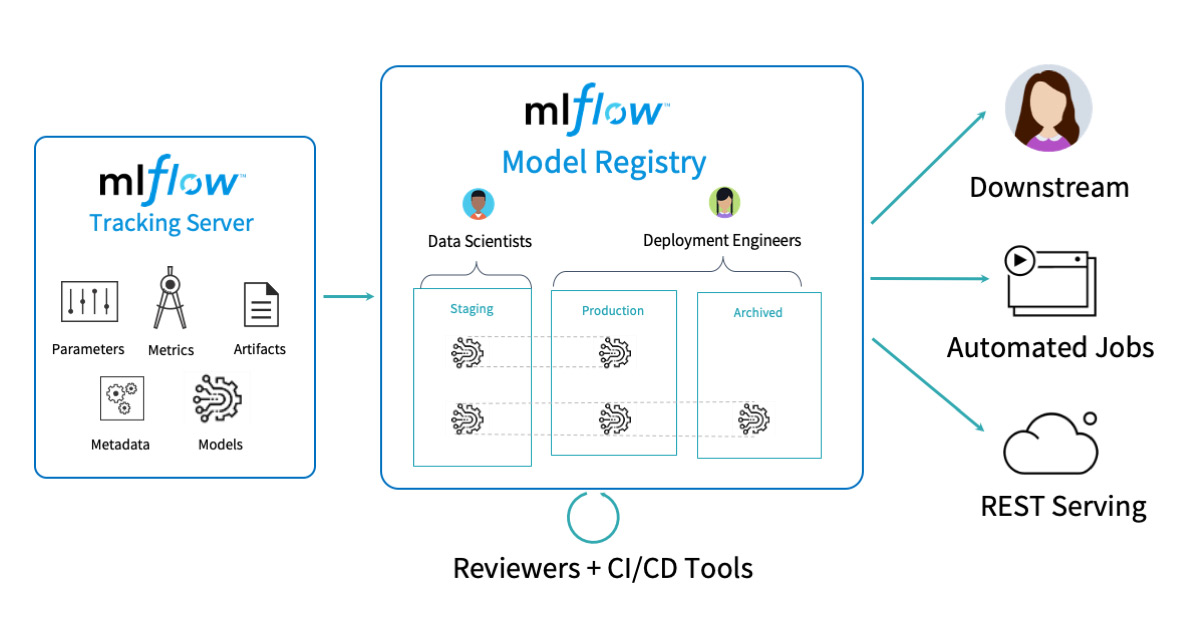

[image](https://www.databricks.com/blog/2020/04/15/databricks-extends-mlflow-model-registry-with-enterprise-features.html)

# Install and importing libs

In [1]:
# Install the requiered packages to run MLFlow

!pip install mlflow --quiet
!pip install pyngrok --quiet

In [3]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 MB 1.9 MB/s eta 0:00:0000:0100:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 3.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 42.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 44.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import torch
print(torch.__version__)

1.13.1+cpu


In [9]:
# %pip -q install matplotlib
%pip -q install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [11]:
import mlflow
import mlflow.pytorch

In [13]:
%pip -q install pytorch-lightning

Note: you may need to restart the kernel to use updated packages.


In [14]:
get_ipython().system_raw("mlflow ui --port 5000 &")
mlflow.pytorch.autolog()

2025/04/23 10:06:51 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of pytorch. If you encounter errors during autologging, try upgrading / downgrading pytorch to a supported version, or try upgrading MLflow.


[2025-04-23 10:06:52 +0700] [887484] [INFO] Starting gunicorn 20.1.0
[2025-04-23 10:06:52 +0700] [887484] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2025-04-23 10:06:52 +0700] [887484] [ERROR] Retrying in 1 second.
[2025-04-23 10:06:53 +0700] [887484] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2025-04-23 10:06:53 +0700] [887484] [ERROR] Retrying in 1 second.
[2025-04-23 10:06:54 +0700] [887484] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2025-04-23 10:06:54 +0700] [887484] [ERROR] Retrying in 1 second.
[2025-04-23 10:06:55 +0700] [887484] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2025-04-23 10:06:55 +0700] [887484] [ERROR] Retrying in 1 second.
[2025-04-23 10:06:56 +0700] [887484] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2025-04-23 10:06:56 +0700] [887484] [ERROR] Retrying in 1 second.
[2025-04-23 10:06:57 +0700] [887484] [ERROR] Can't connect to ('127.0.0.1', 5000)
Running the mlflow server failed. Please see the logs above for details.


# Setting up MLFLow UI

In [1]:
# IMP: please create a auth token from https://dashboard.ngrok.com/auth by creating an account. 
# the below auth ticket will not work for anyone re-running the notebook.
    
from pyngrok import ngrok
from getpass import getpass

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2v8F0qO4mglsXrCz1srI6hkeQS5_2CCJzerU6r1wUQn7fkGFB"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)


MLflow Tracking UI: https://0dc3-27-72-89-59.ngrok-free.app


The above MLflow url is the most important one for monitoring model works. <br> 
Check the mention of Artifact Location: file:///kaggle/working/mlruns/327332781967977011

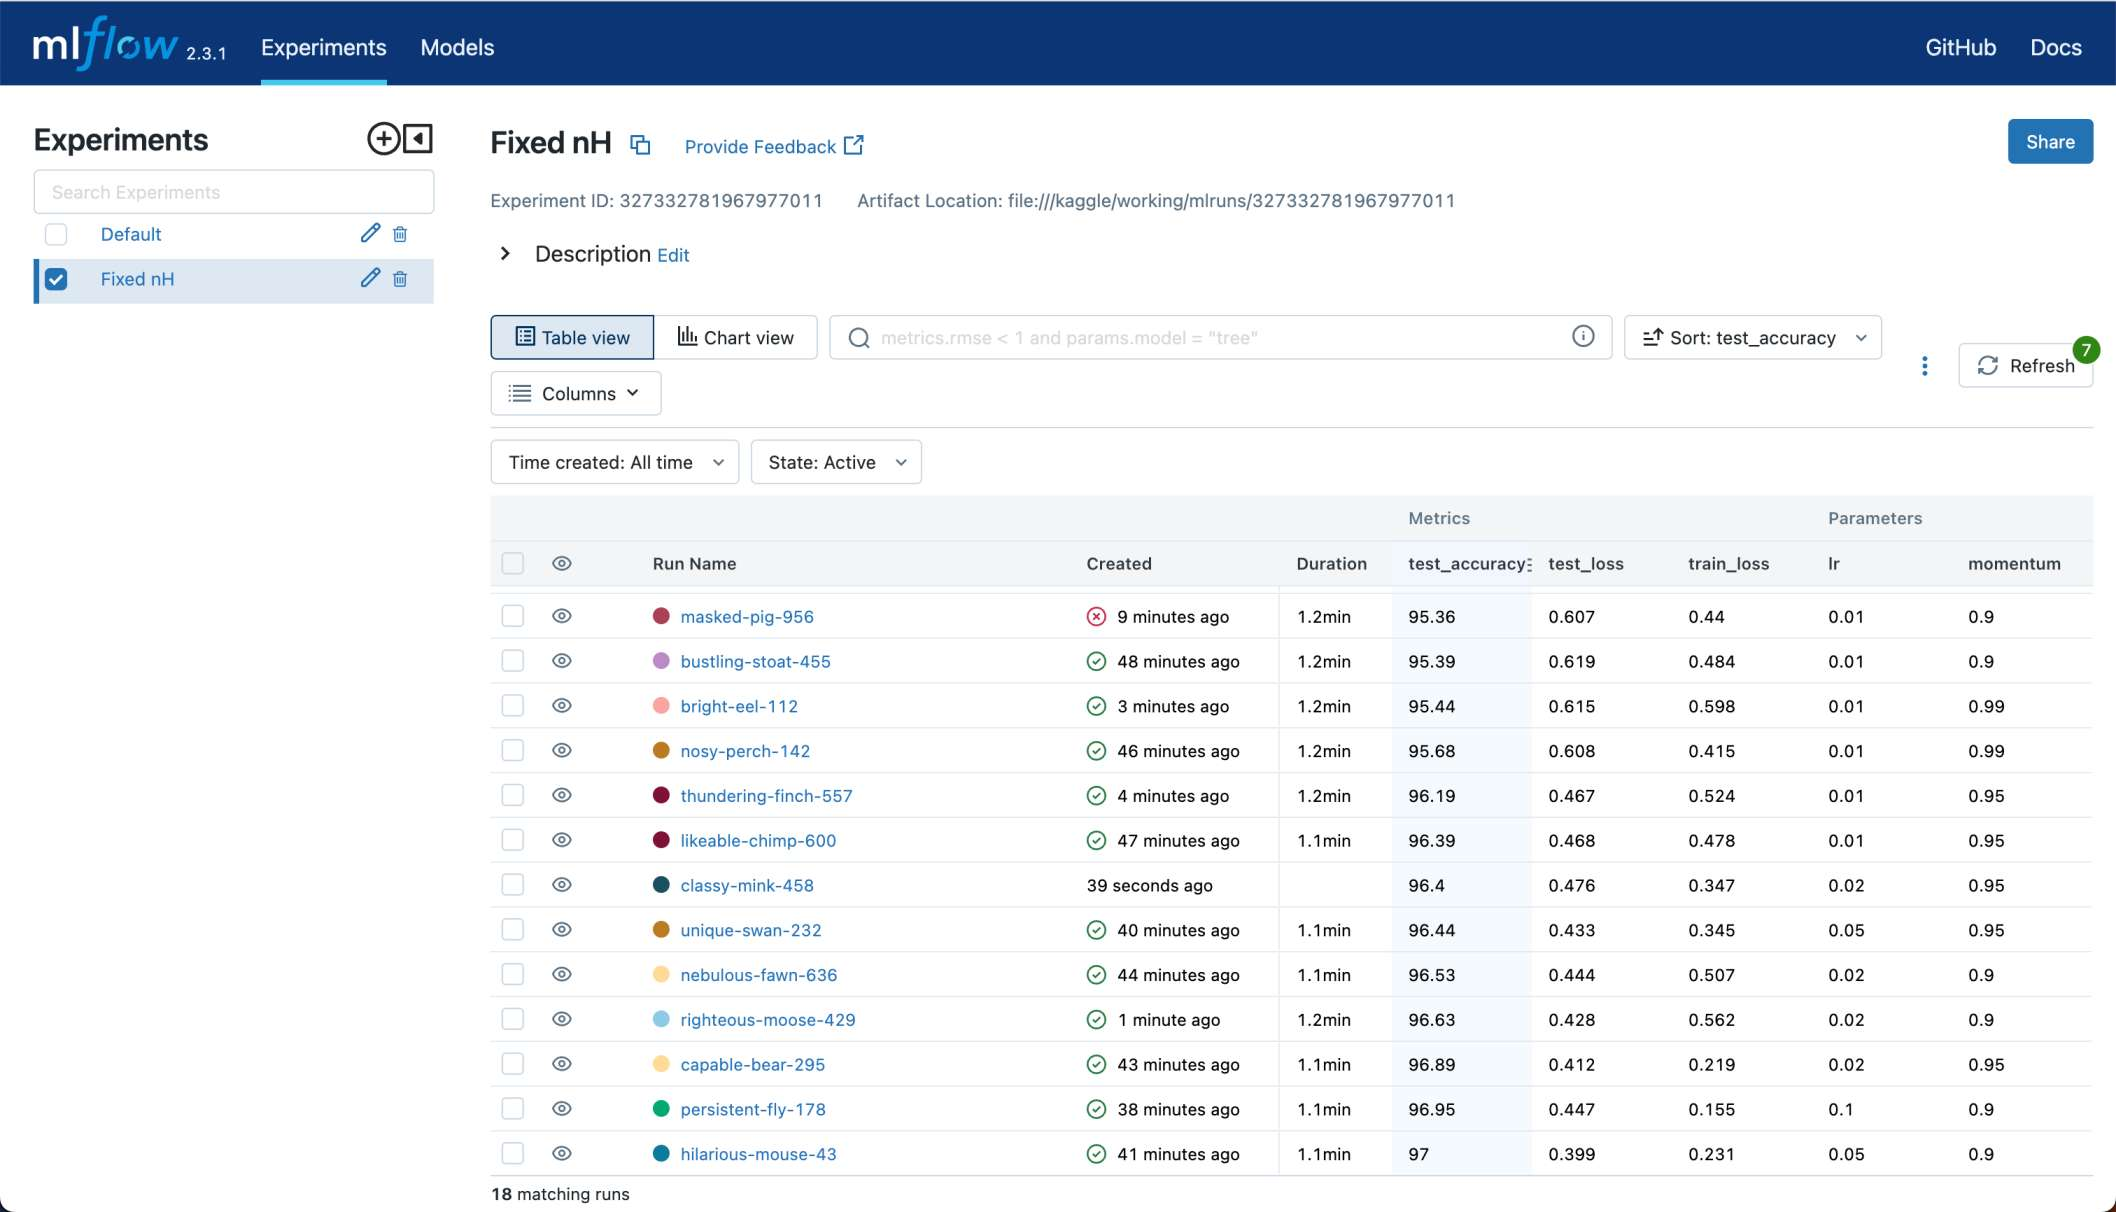

In [17]:
%pip -q install xgboost

Traceback (most recent call last):
  File "/root/miniconda3/envs/mlflow-b23975575d08df8585e7719a1e07dab3732c2a46/lib/python3.7/site-packages/mlflow/store/tracking/file_store.py", line 271, in list_experiments
    experiment = self._get_experiment(exp_id, view_type)
  File "/root/miniconda3/envs/mlflow-b23975575d08df8585e7719a1e07dab3732c2a46/lib/python3.7/site-packages/mlflow/store/tracking/file_store.py", line 405, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/root/miniconda3/envs/mlflow-b23975575d08df8585e7719a1e07dab3732c2a46/lib/python3.7/site-packages/mlflow/store/tracking/file_store.py", line 1109, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/root/miniconda3/envs/mlflow-b23975575d08df8585e7719a1e07dab3732c2a46/lib/python3.7/site-packages/mlflow/store/tracking/file_store.py", line 1102, in _read_helper
    result = read_yaml(root, file_name)
  File "/root/miniconda3/envs/mlf

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import mlflow
import os

# Params

In [23]:
mlflow.set_tracking_uri("/root/thu/BigDataProject/notebook/mlruns")

In [20]:
def load_and_preprocess_data(file_path="train_small.csv"):
    data = pd.read_csv(file_path)

    # Feature Engineering & Transformations
    data["event_time"] = pd.to_datetime(data["event_time"])
    data["event_weekday"] = data["event_time"].dt.dayofweek
    data[["category_code_level1", "category_code_level2"]] = data["category_code"].str.split(".", n=1, expand=True)
    data["is_purchased"] = np.random.randint(0, 2, size=len(data))  # Replace with actual target
    data["activity_count"] = np.random.randint(1, 10, size=len(data))  # Example feature

    # Fill missing values
    for col in ["brand", "event_weekday", "category_code_level1", "category_code_level2"]:
        if col in data.columns:
            data[col] = data[col].fillna("unknown")
    data["price"] = data["price"].fillna(data["price"].median())

    # Label Encoding
    label_encoders = {}
    for col in ["brand", "event_weekday", "category_code_level1", "category_code_level2"]:
        if col in data.columns:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            label_encoders[col] = le

    # Select final features
    data = data[["brand", "price", "event_weekday", "category_code_level1",
                 "category_code_level2", "activity_count", "is_purchased"]].copy()
    return data, label_encoders

# Model

In [27]:
def train_model(data, params):
    """Train an XGBoost model and log with MLflow."""
    
    # Split data
    X = data.drop("is_purchased", axis=1)
    y = data["is_purchased"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    evals_result = {}
    evals = [(dtest, "eval"), (dtrain, "train")]

    # Train the model
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=100,
        evals=evals,
        early_stopping_rounds=5,
        verbose_eval=True,
        evals_result=evals_result
    )

    # Evaluate the model
    y_pred_proba = model.predict(dtest)
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy = np.mean(y_pred == y_test)

    return model, evals_result, accuracy

# Hyperparameter tuning loop

In [ ]:
mlflow.set_experiment('XGBoost_Training')

# Define hyperparameter grid
param_grid = [
    {
        "learning_rate": lr,
        "max_depth": max_depth,
        "subsample": subsample
    }
    for lr in [0.01, 0.05]
    for max_depth in [3, 5]
    for subsample in [0.8, 1.0]
]

# Load and preprocess data
data, label_encoders = load_and_preprocess_data()
print("Data loaded and preprocessed successfully.")

# Base parameters
base_params = {
    "objective": "binary:logistic",
    "eval_metric": ["logloss", "error", "rmse", "mae", "auc"]
}

# # Run hyperparameter tuning
# for param_set in param_grid:
#     params = base_params.copy()
#     params.update(param_set)
    
#     expt_id = f"lr_{params['learning_rate']}_depth_{params['max_depth']}_subsample_{params['subsample']}"
#     print(f"\nTraining with params: {params}\n")

#     with mlflow.start_run(run_name=expt_id):
#         # Log parameters
#         mlflow.log_params(params)
#         mlflow.log_param("num_boost_round", 100)
#         mlflow.log_param("early_stopping_rounds", 5)

#         # Train model
#         model, evals_result, accuracy = train_model(data, params)

#         # Log evaluation metrics
#         for metric in params["eval_metric"]:
#             for dataset in ["eval", "train"]:
#                 metric_name = f"{dataset}-{metric}"
#                 metric_values = evals_result[dataset][metric]
#                 for step, value in enumerate(metric_values):
#                     mlflow.log_metric(metric_name, value, step=step)

#         # Log accuracy
#         mlflow.log_metric("accuracy", accuracy)
#         print(f"Metric logged: accuracy = {accuracy}")

#         # Log model
#         mlflow.xgboost.log_model(model, "model")

Data loaded and preprocessed successfully.

Training with params: {'objective': 'binary:logistic', 'eval_metric': ['logloss', 'error', 'rmse', 'mae', 'auc'], 'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.8}

[0]	eval-logloss:0.69315	eval-error:0.49922	eval-rmse:0.50000	eval-mae:0.50000	eval-auc:0.50102	train-logloss:0.69315	train-error:0.49852	train-rmse:0.50000	train-mae:0.50000	train-auc:0.50129
[1]	eval-logloss:0.69315	eval-error:0.49996	eval-rmse:0.50000	eval-mae:0.50000	eval-auc:0.49967	train-logloss:0.69315	train-error:0.49833	train-rmse:0.50000	train-mae:0.50000	train-auc:0.50212
[2]	eval-logloss:0.69315	eval-error:0.50038	eval-rmse:0.50000	eval-mae:0.50000	eval-auc:0.50040	train-logloss:0.69315	train-error:0.49746	train-rmse:0.50000	train-mae:0.50000	train-auc:0.50340
[3]	eval-logloss:0.69315	eval-error:0.49966	eval-rmse:0.50000	eval-mae:0.50000	eval-auc:0.50053	train-logloss:0.69315	train-error:0.49778	train-rmse:0.50000	train-mae:0.50000	train-auc:0.50358
[4]	eval-log

[2025-04-23 10:20:37 +0700] [886212] [CRITICAL] WORKER TIMEOUT (pid:886231)
[2025-04-23 10:20:37 +0700] [886231] [INFO] Worker exiting (pid: 886231)
[2025-04-23 10:20:37 +0700] [898986] [INFO] Booting worker with pid: 898986


[41]	eval-logloss:0.69316	eval-error:0.49946	eval-rmse:0.50001	eval-mae:0.49999	eval-auc:0.50064	train-logloss:0.69289	train-error:0.48986	train-rmse:0.49987	train-mae:0.49986	train-auc:0.51732
[42]	eval-logloss:0.69316	eval-error:0.49934	eval-rmse:0.50000	eval-mae:0.49999	eval-auc:0.50109	train-logloss:0.69289	train-error:0.48949	train-rmse:0.49987	train-mae:0.49986	train-auc:0.51765
[43]	eval-logloss:0.69316	eval-error:0.49935	eval-rmse:0.50000	eval-mae:0.49999	eval-auc:0.50126	train-logloss:0.69288	train-error:0.48913	train-rmse:0.49987	train-mae:0.49985	train-auc:0.51830
[44]	eval-logloss:0.69316	eval-error:0.49945	eval-rmse:0.50001	eval-mae:0.49999	eval-auc:0.50120	train-logloss:0.69288	train-error:0.48913	train-rmse:0.49987	train-mae:0.49985	train-auc:0.51835
[45]	eval-logloss:0.69316	eval-error:0.49978	eval-rmse:0.50001	eval-mae:0.49999	eval-auc:0.50102	train-logloss:0.69287	train-error:0.48860	train-rmse:0.49986	train-mae:0.49985	train-auc:0.51872
[46]	eval-logloss:0.69316	eval

In [ ]:
# Import thêm thư viện cần thiết
import shutil
import os

# Tạo folder lưu model nếu chưa tồn tại
output_dir = "/root/thu/BigDataProject/notebook/model-checkpoints/final-model/xgb_model/"
os.makedirs(output_dir, exist_ok=True)

# Biến lưu giá trị accuracy tốt nhất
best_accuracy = 0.0
model_idx = 1  # Đếm số thứ tự model

# Run hyperparameter tuning
for param_set in param_grid:
    params = base_params.copy()
    params.update(param_set)
    
    expt_id = f"lr_{params['learning_rate']}_depth_{params['max_depth']}_subsample_{params['subsample']}"
    print(f"\nTraining with params: {params}\n")

    with mlflow.start_run(run_name=expt_id):
        # Log parameters
        mlflow.log_params(params)
        mlflow.log_param("num_boost_round", 100)
        mlflow.log_param("early_stopping_rounds", 5)

        # Train model
        model, evals_result, accuracy = train_model(data, params)

        # Log evaluation metrics
        for metric in params["eval_metric"]:
            for dataset in ["eval", "train"]:
                metric_name = f"{dataset}-{metric}"
                metric_values = evals_result[dataset][metric]
                for step, value in enumerate(metric_values):
                    mlflow.log_metric(metric_name, value, step=step)

        # Log accuracy
        mlflow.log_metric("accuracy", accuracy)
        print(f"Metric logged: accuracy = {accuracy}")

        # Chỉ lưu model nếu accuracy tốt hơn model trước đó
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            print(f"New best model found with accuracy: {accuracy}. Saving model...")

            # Log model vào MLflow
            mlflow.xgboost.log_model(model, "model")

            # Lấy đường dẫn model artifact
            artifact_uri = mlflow.get_artifact_uri("model")
            artifact_path = artifact_uri.replace("file://", "")  # Đường dẫn thực tế trên hệ thống

            # Copy model sang folder mới với tên định dạng
            new_model_path = os.path.join(output_dir, f"xgboost_model_ver_{model_idx}.ubj")
            shutil.copytree(artifact_path, new_model_path)
            print(f"Model saved to: {new_model_path}")

            model_idx += 1  # Tăng số thứ tự model

# Loading and visualising a model

In [ ]:
# # Loading a logged model
# model_path = "runs:/<run_id>/model"  # Replace <run_id> with actual run ID from MLflow UI
# loaded_model = mlflow.xgboost.load_model(model_path)
# print("Loaded model:", loaded_model)

# print("Pipeline finished successfully!")

In [ ]:
import mlflow
import mlflow.xgboost

# Lấy thông tin thí nghiệm hiện tại
experiment = mlflow.get_experiment_by_name("XGBoost_Training")
if experiment is None:
    raise ValueError("Experiment 'XGBoost_Training' does not exist.")

# Lấy danh sách các run trong thí nghiệm
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
if runs.empty:
    raise ValueError("No runs found in the experiment.")

# Lấy run_id của run đầu tiên (hoặc bạn có thể chọn run khác dựa trên điều kiện)
run_id = runs.iloc[0]["run_id"]

# Tải mô hình từ run_id
model_path = f"runs:/{run_id}/model"
loaded_model = mlflow.xgboost.load_model(model_path)
print("Loaded model:", loaded_model)

print("Pipeline finished successfully!")

In [ ]:
# randomly taking a logged model for further analysis. 

import os
dcm =[]
for path, dirs, filename in os.walk("/root/thu/BigDataProject/notebook/mlruns"): 
    for dirname in dirs:
        fullpath = os.path.join(path,dirname)
        if "artifacts" in dirname:
            dcm.append(fullpath)
#print(dcm[0])
model_path = dcm[0]+"/model"
print(model_path)

In [ ]:
# model_load = mlflow.pytorch.load_model(model_path)

In [ ]:
# print(model_load)

In [ ]:
# weight_layer0 = list(model_load.parameters())[0].data.numpy()
# print(weight_layer0.shape)

In [ ]:
# sns.distplot(weight_layer0.ravel())
# plt.plot()

In [ ]:
# sns.heatmap(np.abs(weight_layer0))
# plt.show()

In [ ]:
# weight_layer1 = list(model_load.parameters())[2].data.numpy()
# weight_layer1.shape

In [ ]:
# sns.distplot(weight_layer1.ravel())
# plt.plot()

In [ ]:
# sns.heatmap(np.abs(weight_layer1))
# plt.show()

In [ ]:
# nrows = 6
# ncols = 8
# fig = plt.figure(figsize=(1.5*ncols, 1.5*nrows))

# for i in np.arange(48): 
#     ax1 = fig.add_subplot(nrows, ncols, i+1)
#     sns.heatmap(np.abs((weight_layer0[i, 0:784]).reshape(28, 28)), ax = ax1, cbar=False)
#     ax1.axis('off')
#     ax1.set_xticklabels([])
#     ax1.set_yticklabels([])
#     ax1.set_title(i)
# plt.tight_layout()
# plt.show()

# END 